In [36]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)
import spacy


(78458, 11)


In [37]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
df = df[df['Views'] > df["Likes"]]

In [38]:
# from spacy.lang.en import English
# nlp = English()
# from spacy.lang.en.stop_words import STOP_WORDS
# def remove_stop_words(song_name,name) :

#     song_name = str(song_name)
#     song_name = song_name.strip(str(name))
#     doc = nlp(song_name)
#     new_song_name = []
#     for tokens in doc:
#         if tokens.is_stop==False :
#             new_song_name.append(tokens.text)
#     return  (' '.join(new_song_name) )

# df['new_song_name'] = df.apply(lambda x : remove_stop_words(x['Song_Name'],x['Name']),axis=1)

In [39]:
print(df.shape)

(77170, 11)


In [40]:
# import sklearn as sklearn
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# # ngram level tf-idf 
# tfidf_vect_ngram = TfidfVectorizer(analyzer='word',  ngram_range=(1,2),max_features=400)
# fitted_vec = tfidf_vect_ngram.fit_transform(df['new_song_name'].values.astype('U'))

# df_song_name = pd.DataFrame(fitted_vec.toarray(), columns=tfidf_vect_ngram.get_feature_names())


In [41]:
df.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499.0,97.0,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49.0,17.0,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312.0,91.0,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,2400.0,76.0,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,3031.0,699.0,201030


In [56]:
df_name_avg_likes = df.groupby('Name')['Likes'].mean()
df['Avg_likes'] = df['Name'].map(df_name_avg_likes)

KeyError: 'Name'

In [43]:
df.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers,Avg_likes
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499.0,97.0,119563,773.388790
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49.0,17.0,2141,285.541667
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312.0,91.0,22248,446.406250
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,2400.0,76.0,393655,4208.925714
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,3031.0,699.0,201030,2257.355634


In [44]:
#Correlation matrix
# df.drop(['Unique_ID','Genre','Country','Timestamp','Song_Name','Followers','Comments','Popularity','new_song_name'],inplace = True, axis = 1)

df.drop(['Unique_ID','Genre','Country','Song_Name','Timestamp','Followers','Comments'],inplace = True, axis = 1)


In [45]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# # Converting Genre and Name to labelencoding
# labelencoder = LabelEncoder()
# df['Name'] = labelencoder.fit_transform(df['Name'])
# df.head()

import numpy as np
bins = [-1,0.1,4,10,20,30,50,75,100,125,150,175,200,230,270,300,330,370,400,450,500,600,650,700,750,800,850,950,1000,1200,1400,1600,
        1800,2000,2300,2700,3000,3500,4000,5000,6000,7000,8000,10000,15000,
        20000,40000,60000,100000,np.inf]
names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
         38,39,40,41,42,43,44,45,46,47,48,49]
df['Name_Label'] = pd.cut(df['Avg_likes'], bins, labels=names)


In [46]:
df.drop(['Name','Avg_likes'],inplace = True, axis = 1)
df.head()

,Views,Likes,Popularity,Name_Label
0,14017,499.0,97.0,25
1,1918,49.0,17.0,15
2,9668,312.0,91.0,19
3,113036,2400.0,76.0,39
4,110024,3031.0,699.0,34


In [47]:

#Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()
ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Likes','Popularity'])
       ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Likes','Popularity','Views','Name_Label'])
print(df.head())

      Likes Popularity   Views Name_Label
0 -0.159204  -0.173071   14017         25
1 -0.167662   -0.18957    1918         15
2 -0.162719  -0.174308    9668         19
3 -0.123471  -0.177402  113036         39
4  -0.11161 -0.0489176  110024         34


In [48]:
from sklearn.preprocessing import OneHotEncoder
nameoneHotEncoder = OneHotEncoder(categories='auto')
name_transformed_data = nameoneHotEncoder.fit_transform((df['Name_Label'].values).reshape(-1,1))
name_hashed_features = pd.DataFrame( name_transformed_data.toarray()).add_prefix('gen_')
name_hashed_features.head()



,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,...,gen_39,gen_40,gen_41,gen_42,gen_43,gen_44,gen_45,gen_46,gen_47,gen_48
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df.drop(['Name_Label'],inplace = True, axis = 1)

In [50]:
 df = df.join(name_hashed_features)
# df = df.join(df_song_name)
print(df.shape)
df['Likes'] = df['Likes'].apply(pd.to_numeric, errors='coerce')
# df['Name_Label'] = df['Name_Label'].apply(pd.to_numeric, errors='coerce')
df['Popularity'] = df['Popularity'].apply(pd.to_numeric, errors='coerce')

(77170, 52)


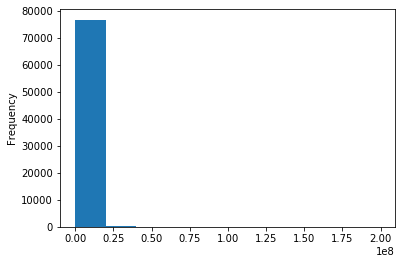

In [51]:
y = df['Views']
df.drop(['Views'],inplace=True,axis=1)
y.plot.hist()

In [53]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=205)

In [54]:
#XGB Boost regression
import xgboost as xgb
from sklearn import metrics
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("RMSE - XGBoost regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


d:\applnsanaconda3\envs\hackathon\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:54:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.35707e+06
[1]	validation_0-rmse:3.03555e+06
[2]	validation_0-rmse:2.75289e+06
[3]	validation_0-rmse:2.50845e+06
[4]	validation_0-rmse:2.27444e+06
[5]	validation_0-rmse:2.0732e+06
[6]	validation_0-rmse:1.89272e+06
[7]	validation_0-rmse:1.72244e+06
[8]	validation_0-rmse:1.58427e+06
[9]	validation_0-rmse:1.45174e+06
[10]	validation_0-rmse:1.33829e+06
[11]	validation_0-rmse:1.23556e+06
[12]	validation_0-rmse:1.14884e+06
[13]	validation_0-rmse:1.06882e+06
[14]	validation_0-rmse:999867
[15]	validation_0-rmse:936997
[16]	validation_0-rmse:885166
[17]	validation_0-rmse:836342
[18]	validation_0-rmse:795925
[19]	validation_0-rmse:760088
[20]	validation_0-rmse:729412
[21]	validation_0-rmse:704566
[22]	validation_0-rmse:680796
[23]	validation_0-rmse:661684
[24]	validation_0-rmse:644213
[25]	validation_0-rmse:6308

In [55]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("RMSE - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE - Linear regression:  621943.2760327647


In [16]:
import pandas as pd
# In[83]:
test_df = pd.read_csv('Data_Test.csv')
test_df.head(10)
print(test_df.shape)

(19615, 10)


In [38]:
#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

test_df.Likes = test_df.Likes.apply(value_to_float)
test_df.Popularity = test_df.Popularity.apply(value_to_float)

In [39]:
# test_df['new_song_name'] = test_df.apply(lambda x : remove_stop_words(x['Song_Name'],x['Name']),axis=1)

In [40]:
test_df.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Comments,Likes,Popularity,Followers
0,562546,L2Share♫79,all-music,AU,엔플라잉 N.Flying - Rooftop (옥탑방),2019-01-02 09:49:19.000000,26,5428.0,118.0,2568
1,907584,Morgan Page,danceedm,AU,Morgan Page - In The Air - Episode 246,2015-03-09 17:30:10.000000,18,738.0,195.0,155645
2,213013,Dirty Workz,danceedm,AU,Outlander - Devotion (Official HQ Preview),2013-09-18 16:09:03.000000,18,386.0,96.0,29446
3,340312,Gucci Mane,all-music,AU,Freaky Gurl,2007-08-14 00:00:00.000000,1,388.0,19.0,799410
4,41854,Angga Kecap,rock,AU,Radical Nusantara - Teman,2018-08-10 16:28:54.000000,0,79.0,1.0,2


In [41]:
#Correlation matrix
# test_fitted_vec = tfidf_vect_ngram.transform(test_df['new_song_name'].values.astype('U'))
# test_df_song_name = pd.DataFrame(test_fitted_vec.toarray(), columns=tfidf_vect_ngram.get_feature_names())

In [42]:
#Correlation matrix
test_df.drop(['Unique_ID','Genre','Country','Timestamp','Followers','Comments','Song_Name'],inplace = True, axis = 1)

In [43]:
test_df.shape

(19615, 3)

In [44]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# # Converting Genre and Name to labelencoding
# labelencoder = LabelEncoder()
# test_df['Name'] = labelencoder.fit_transform(test_df['Name'])
test_df['Avg_likes'] = test_df['Name'].map(df_name_avg_likes)
test_df.head()

,Name,Likes,Popularity,Avg_likes
0,L2Share♫79,5428.0,118.0,4009.125000
1,Morgan Page,738.0,195.0,808.487342
2,Dirty Workz,386.0,96.0,444.341040
3,Gucci Mane,388.0,19.0,14868.724551
4,Angga Kecap,79.0,1.0,42.000000


In [45]:
import numpy as np
bins = [-1,0.1,4,10,20,30,50,75,100,125,150,175,200,230,270,300,330,370,400,450,500,600,650,700,750,800,850,950,1000,1200,1400,1600,
        1800,2000,2300,2700,3000,3500,4000,5000,6000,7000,8000,10000,15000,
        20000,40000,60000,100000,np.inf]
names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
         38,39,40,41,42,43,44,45,46,47,48,49]
test_df['Name_Label'] = pd.cut(test_df['Avg_likes'], bins, labels=names)
test_df.drop(['Name','Avg_likes'],inplace = True, axis = 1)


In [46]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()
ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Likes','Popularity'])
       ], remainder='passthrough')
test_df = ct.fit_transform(test_df)
test_df = pd.DataFrame(test_df,columns=['Likes','Popularity','Name_Label'])
print(test_df.head())

      Likes  Popularity  Name_Label
0 -0.068006   -0.166740        39.0
1 -0.158250   -0.151475        26.0
2 -0.165023   -0.171102        19.0
3 -0.164984   -0.186368        44.0
4 -0.170930   -0.189936         6.0


In [48]:
# test_df = test_df.join(test_df_song_name)
# print(test_df.shape)
test_df['Likes'] = test_df['Likes'].apply(pd.to_numeric, errors='coerce')
test_df['Popularity'] = test_df['Popularity'].apply(pd.to_numeric, errors='coerce')

In [49]:
# calculate the auc score
y_pred_1 = xlf.predict(test_df)
y_pred_1 = pd.DataFrame(y_pred_1)
y_pred_1.to_csv('Data_Test_PredictedTarget_Encode_Artist_Name_Popularity_Likes.csv',sep='#')